In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('default')
import os 
import sys
sys_path = sys.path.copy()
sys.path.append('../')
import utils.utils as utils
sys.path = sys_path
plot_dir = '../output/plots/'

In [8]:
output_dir='../output/'

In [22]:
# Code for pretty plots
# https://towardsdatascience.com/making-matplotlib-beautiful-by-default-d0d41e3534fd
import seaborn as sns
label_text_color='#555555'
text_color="black"
accent_color="lightgrey"
sns.set(font="Franklin Gothic Book",
        rc={
 "axes.axisbelow": False,
 "axes.edgecolor": accent_color,
 "axes.facecolor": "None",
 "axes.grid": False,
 "axes.labelcolor": text_color,
 "axes.spines.right": False,
 "axes.spines.top": False,
 "figure.facecolor": "white",
 "lines.solid_capstyle": "round",
 "patch.edgecolor": "w",
 "patch.force_edgecolor": True,
 "text.color": text_color,
 "xtick.bottom": True,
 "xtick.color": accent_color,
 "xtick.labelcolor": label_text_color,
 "xtick.direction": "out",
 "xtick.labelsize": 18,
 "xtick.top": False,
 "ytick.color": label_text_color,
 "ytick.direction": "out",
 "ytick.left": False,
 "ytick.right": False})
sns.set_context("notebook", rc={"font.size":24,
                                "axes.titlesize":26,
                                "axes.labelsize":26,
                                "axes.xticksize":26})
tu_c1='#004E8A'

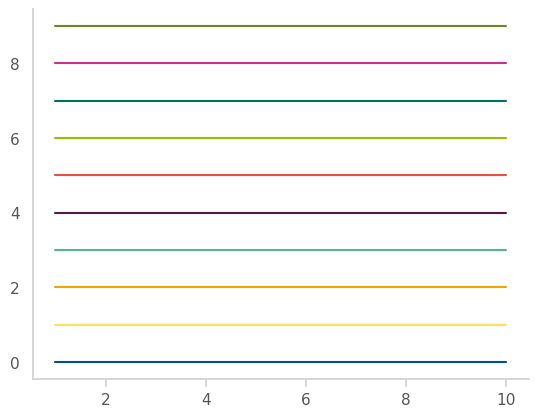

In [23]:
COLORS = ['#004E8A', '#B90F22', '#FFE05C', '#F5A300', '#00715E', '#50B695', '#C9308E', '#6A8B22']
COLORS = ['#004E8A', '#FFE05C', '#F5A300', '#50B695', '#581845', '#E9503E', '#99C000', '#00715E', '#C9308E', '#6A8B22']

# 1c (adapt), 4d, 6a (lora-q), 7b (lora-v), 10a (adapt-emo), 3d, 3a, 9c
col_by_method = {'gate_lora_query':'#FFE05C', 'gate_lora_value':'#F5A300', 'gate_adapter-distress':'#004E8A', 'gate_adapter-empathy':'#004E8A', 'gate_adapter-emotion':'#50B695', 'gate_prefix':'#E9503E'}
def get_color(i, method_name=None):
    """Either get color by method name or i

    Args:
        i (_type_): _description_
        method_name (str, optional): _description_. Defaults to ''.
    """
    col = '#000000'
    if method_name and method_name in col_by_method.keys():
        col = col_by_method[method_name]
    else:
        i = i % len(COLORS)  # if index too long, start with color from beginning again
        col = COLORS[i]
    
    return col

get_color(6)
for i, col in enumerate(COLORS):
    y = np.array([1,1,1,1,1,1,1,1,1,1]) * i
    plt.plot([1,2,3,4,5,6,7,8,9,10], y, c=col)
plt.show()

In [24]:
def color_per_method(method_name):
    method_names = ['gate_adapter-distress', 'gate_lora_query', 'gate_lora_value', 'gate_prefix', 'gate_adapter-empathy', 'gate_adapter-bert-base-uncased-pf-emotion']
    this_colors = COLORS[:len(method_names)]  # cut off color list
    color_dict = {m: c for m, c in zip(method_names, this_colors)}
    if method_name not in color_dict.keys():
        return COLORS[-1]
    return color_dict[method_name]

In [25]:
gates = None
#model_name = 'unipelt_apl_1e-4'
#model_display_name = 'APL 1e-4'
#model_name = 'unipelt_apl_2e-4'
#model_display_name = 'APL 2e-4'
model_name = 'unipelt_apl_5e-4'
model_display_name = 'APL 5e-4'
#model_name = 'unipelt_apl_stack'
#model_display_name = 'APL Stack EMO'
#model_name = 'adapter_stack'
#model_display_name = 'Adapter Stack EMO'
task_name = 'distress'
gates = pd.read_csv(f'../output/{model_name}/{task_name}/gates.csv')

795.0
grouped mean


,gate_adapter-distress,gate_lora_query,gate_lora_value,gate_prefix
encoder_layer,,,,
0,0.937872,0.978592,0.934723,0.167803
1,0.965471,0.988600,0.775680,0.169069
2,0.959203,0.996376,0.965759,0.126931
3,0.946955,0.991472,0.904099,0.174237
4,0.902404,0.995068,0.890962,0.073186
5,0.820070,0.991473,0.946501,0.376871
6,0.855913,0.994433,0.962728,0.438555
7,0.585575,0.960529,0.965402,0.464516
8,0.655493,0.982548,0.646748,0.577377


Grouped std


,gate_adapter-distress,gate_lora_query,gate_lora_value,gate_prefix
encoder_layer,,,,
0,0.016499,0.006187,0.012827,0.030441
1,0.007336,0.003230,0.049196,0.036328
2,0.006858,0.000800,0.008157,0.030198
3,0.009063,0.001575,0.012619,0.037412
4,0.010171,0.000876,0.023501,0.016212
5,0.029693,0.001433,0.007015,0.035608
6,0.015984,0.000933,0.004698,0.032824
7,0.047894,0.009850,0.004958,0.035721
8,0.048721,0.005407,0.043185,0.078261


2


/var/folders/kx/k45gj1_52ns5bsbjyn403cs00000gn/T/ipykernel_4781/886579746.py:51: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_xticklabels(grouped_mean.index.to_numpy() + 1)


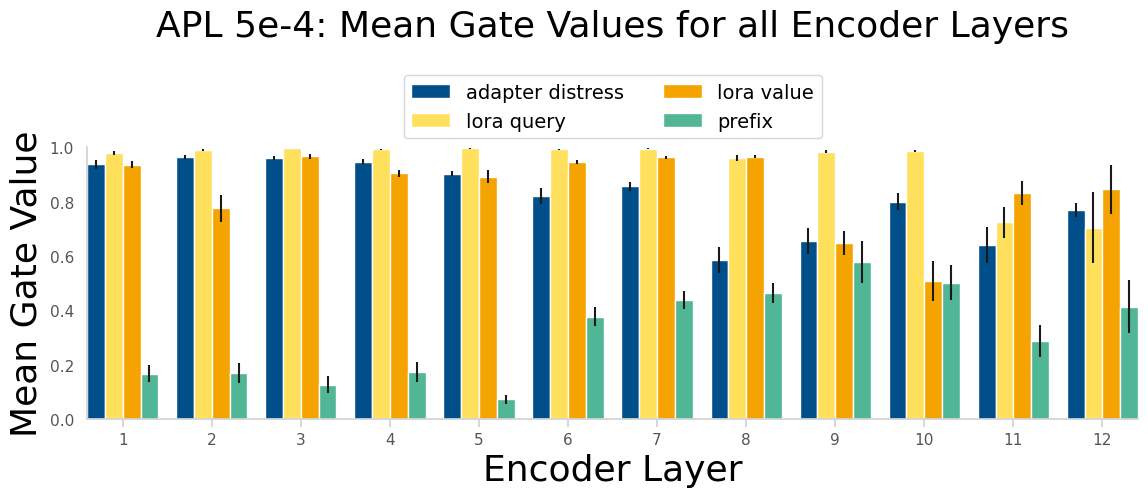

In [26]:


encoder_layers = sorted(set(gates['encoder_layer']))
# get eval and train of last epoch while in train
last_train = gates[(gates['split'] == 'train') & (gates['epoch'] == max(gates['epoch'])) & (gates['is_in_train'] == True)].reset_index()
after_train_eval = gates[(gates['split'] == 'eval') & (gates['is_in_train'] == False)].reset_index()
after_train_test = gates[(gates['split'] == 'test') & (gates['is_in_train'] == False)].reset_index()

data = after_train_test
print(len(data) / 12)
data

encoder_layers = sorted(set(gates['encoder_layer']))
# get eval and train of last epoch while in train
last_train = gates[(gates['split'] == 'train') & (gates['epoch'] == max(gates['epoch'])) & (gates['is_in_train'] == True)].reset_index()
after_train_eval = gates[(gates['split'] == 'eval') & (gates['is_in_train'] == False)].reset_index()
after_train_test = gates[(gates['split'] == 'test') & (gates['is_in_train'] == False)].reset_index()

show_plot_crit = lambda key: len(gate_per_set[key]) > 0 # criterion to not show the plot for the data set, here: if dataset not used / df is empty
gate_per_set = {'train':last_train, 'eval':after_train_eval, 'test':after_train_test}
count_data_available = sum([1 for key in gate_per_set.keys() if show_plot_crit(key)])

idx = 0
for key in gate_per_set.keys():
    if show_plot_crit(key) and key=='test':
        dataset = gate_per_set[key]

        gating_cols = [col for col in dataset.columns if 'gate' in col]
        grouped_mean = dataset.groupby(['encoder_layer']).agg({col: 'mean' for col in gating_cols})
        grouped_std = dataset.groupby(['encoder_layer']).agg({col: 'std' for col in gating_cols})
        print('grouped mean')
        display(grouped_mean)
        print('Grouped std')
        display(grouped_std)
        bar_width = 2
        width = bar_width * (len(gating_cols)) + bar_width
        x = grouped_mean.index.to_numpy() * width
        this_colors = COLORS
        if len(this_colors) < len(gating_cols):  # if not enough colors in the list
            this_colors = [COLORS[i] if i < len(COLORS) else '#000000' for i in range(len(gating_cols))]

        fig, axs = plt.subplots()
        fig.set_figwidth(len(grouped_mean))
        fig.set_figheight(5.5)
        for idx, col in enumerate(gating_cols):
            y_pos = x + idx * bar_width
            #color_i = this_colors[idx]
            color_i = color_per_method(col)
            label_i = col[5:].replace('-', ' ').replace('_', ' ')
            axs.bar(x=y_pos, yerr=grouped_std[col], height=grouped_mean[col], width=bar_width, label=label_i, color=color_i)#, 'gate_lora_value', 'gate_lora_query', 'gate_adapters']], label=['gate_prefix', 'gate_lora_value', 'gate_lora_query', 'gate_adapters'])
        
        axs.set_xlabel('Encoder Layer')
        axs.set_xticklabels(grouped_mean.index.to_numpy() + 1)
        axs.set_xticks(x + ((len(gating_cols)-1) * bar_width)/2)
        #axs.set_title(f'{key} data set')
        axs.set_xlim(x[0]-bar_width/2, x[-1] + ((len(gating_cols)-1) * bar_width) + bar_width/2)
        axs.set_ylim(0,1)
        axs.set_ylabel('Mean Gate Value')
        #axs.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        legend_col = int(len(gating_cols) / 2)
        print(legend_col)
        axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), prop={'size': 14}, ncol=legend_col, fancybox=True)

        #fig.suptitle()
        axs.set_title(f'{model_display_name}: Mean Gate Values for all Encoder Layers', pad=80)
        fig.tight_layout()
        title = f'{key}/gating_layers'
        fig.savefig(f'{output_dir}/{model_name}/{model_name}_{task_name}_' + title.replace('/', '_') + '.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)
        #plt.close()
        #fig.show()


In [27]:
grouped_std['gate_prefix']
grouped_mean['gate_prefix']

encoder_layer
0     0.167803
1     0.169069
2     0.126931
3     0.174237
4     0.073186
5     0.376871
6     0.438555
7     0.464516
8     0.577377
9     0.502459
10    0.286199
11    0.414020
Name: gate_prefix, dtype: float64

In [ ]:
def get_grouped_std_mean(gates, split, display_df=True):
    after_train_test = gates[(gates['split'] == 'test') & (gates['is_in_train'] == False)].reset_index()


    encoder_layers = sorted(set(gates['encoder_layer']))
    # get eval and train of last epoch while in train
    last_train = gates[(gates['split'] == 'train') & (gates['epoch'] == max(gates['epoch'])) & (gates['is_in_train'] == True)].reset_index()
    after_train_eval = gates[(gates['split'] == 'eval') & (gates['is_in_train'] == False)].reset_index()
    after_train_test = gates[(gates['split'] == 'test') & (gates['is_in_train'] == False)].reset_index()

    data = after_train_test

    encoder_layers = sorted(set(gates['encoder_layer']))
    # get eval and train of last epoch while in train
    last_train = gates[(gates['split'] == 'train') & (gates['epoch'] == max(gates['epoch'])) & (gates['is_in_train'] == True)].reset_index()
    after_train_eval = gates[(gates['split'] == 'eval') & (gates['is_in_train'] == False)].reset_index()
    after_train_test = gates[(gates['split'] == 'test') & (gates['is_in_train'] == False)].reset_index()

    show_plot_crit = lambda key: len(gate_per_set[key]) > 0 # criterion to not show the plot for the data set, here: if dataset not used / df is empty
    gate_per_set = {'train':last_train, 'eval':after_train_eval, 'test':after_train_test}
    count_data_available = sum([1 for key in gate_per_set.keys() if show_plot_crit(key)])

    if split in gate_per_set.keys():
        dataset = gate_per_set[split]
        gating_cols = [col for col in dataset.columns if 'gate' in col]
        grouped_mean = dataset.groupby(['encoder_layer']).agg({col: 'mean' for col in gating_cols})
        grouped_std = dataset.groupby(['encoder_layer']).agg({col: 'std' for col in gating_cols})
        if display_df:
            print('grouped mean')
            display(grouped_mean)
            print('Grouped std')
            display(grouped_std)
    return grouped_mean, grouped_std

# Gate mean and std values:

In [ ]:
model_name = 'unipelt_apl_5e-4'
model_display_name = 'APL 5e-4'
task_name = 'distress'
print(f'{model_display_name} \t {task_name}')
gates = pd.read_csv(f'../output/{model_name}/{task_name}/gates.csv')
mean, std = get_grouped_std_mean(gates, 'test')
# get max std
max_std = np.max(std.to_numpy().flatten())
np.mean(std.to_numpy().flatten())

In [ ]:
model_name = 'unipelt_apl_1e-4'
model_display_name = 'APL 1e-4'
task_name = 'distress'
print(f'{model_display_name} \t {task_name}')
gates = pd.read_csv(f'../output/{model_name}/{task_name}/gates.csv')
mean, std = get_grouped_std_mean(gates, 'test')
# get max std
max_std = np.max(std.to_numpy().flatten())
np.mean(std.to_numpy().flatten())

In [ ]:
# compare mean of empathy and mean distress for a model
model_name = 'unipelt_apl_1e-4'
model_display_name = 'APL 1e-4'
task_name = 'distress'
gates_emp = pd.read_csv(f'../output/{model_name}/empathy/gates.csv')
gates_dis = pd.read_csv(f'../output/{model_name}/distress/gates.csv')
mean_emp, std_emp = get_grouped_std_mean(gates_emp, 'test', display_df=False)
mean_dis, std_dis = get_grouped_std_mean(gates_dis, 'test', display_df=False)
mean_emp - mean_dis

In [ ]:
model_name = 'unipelt_apl_2e-4'
model_display_name = 'APL 2e-4'
task_name = 'empathy'
print(f'{model_display_name} \t {task_name}')
gates = pd.read_csv(f'../output/{model_name}/{task_name}/gates.csv')
mean, std = get_grouped_std_mean(gates, 'test')

In [ ]:
model_name = 'unipelt_apl_stack'
model_display_name = 'APL Stack EMO'
task_name = 'empathy'
print(f'{model_display_name} \t {task_name}')
gates = pd.read_csv(f'../output/{model_name}/{task_name}/gates.csv')
mean, std = get_grouped_std_mean(gates, 'test')

In [ ]:
model_name = 'adapter_stack'
model_display_name = 'Adapter Stack EMO'
task_name = 'distress'
print(f'{model_display_name} \t {task_name}')
gates = pd.read_csv(f'../output/{model_name}/{task_name}/gates.csv')
mean, std = get_grouped_std_mean(gates, 'test')

# get the overall mean for the gates
overall_mean_task = np.mean(mean[f'gate_adapter-{task_name}'].to_numpy().flatten())
overall_mean_emo = np.mean(mean['gate_adapter-bert-base-uncased-pf-emotion'].to_numpy().flatten())
print(f'Mean task: {overall_mean_task}')
print(f'Mean emo: {overall_mean_emo}')

In [ ]:
from turtle import color, pos


model_name = 'adapter_stack'
model_display_name = 'Adapter Stack 1e-4'
gates_emp = pd.read_csv(f'../output/{model_name}/empathy/gates.csv')
gates_dis = pd.read_csv(f'../output/{model_name}/distress/gates.csv')
mean_emp, std_emp = get_grouped_std_mean(gates_emp, 'test', display_df=False)
mean_dis, std_dis = get_grouped_std_mean(gates_dis, 'test', display_df=False)

# difference between empathy and distress for emotionstacking
mean_emp = mean_emp.rename(columns={"gate_adapter-empathy": "gate_adapter-task"})
mean_dis = mean_dis.rename(columns={"gate_adapter-distress": "gate_adapter-task"})
display(mean_emp - mean_dis)

# difference in task related adapter and emotion adapter
difference_emp = mean_emp['gate_adapter-task'] - mean_emp['gate_adapter-bert-base-uncased-pf-emotion']
difference_dis = mean_dis['gate_adapter-task'] - mean_dis['gate_adapter-bert-base-uncased-pf-emotion']
print('difference_emp')
display(difference_emp)
print('difference_dis')
display(difference_dis)

plt.grid(c=accent_color, linestyle='--', zorder=0) #, alpha=0.2 
plt.plot(difference_emp, label='Difference EMP - EMO', c=color_per_method('gate_adapter-empathy'), zorder=3)
plt.plot(difference_dis, label='Difference DIS - EMO', c=color_per_method('gate_adapter-distress'), zorder=3)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylim(0,1)
plt.xlim(0,11)
plt.xlabel('Encoder Layer')
plt.ylabel('Gate Value Difference')
plt.title(f'The Difference of the Task-Related and the Emotion Adapter', pad=20) #  pad=80
plt.xticks(np.array(range(0, 12)), labels=np.array(range(1, 13)))
plt.savefig(f'{output_dir}/{model_name}/{model_name}_difference_task_emo.pdf', bbox_inches='tight', dpi=plt.gcf().dpi)
#plt.close()

# Generate output for a model

In [ ]:

def generate_result_file(model_name, output_dir='../output/', store_as_tsv=True, columns=['empathy', 'distress'], output_file_name='predictions_EMP', split='test'):
    """Loading from results file of a model and generate an output file

    Args:
        model_name (_type_): _description_
        output_dir (str, optional): _description_. Defaults to '../output/'.
        store_as_tsv (bool, optional): _description_. Defaults to True.
        columns (list, optional): _description_. Defaults to ['empathy', 'distress'].
    """
    model_dir = output_dir + model_name + '/'

    subdirs = [x[0] for x in os.walk(model_dir)] 
    subdirs = [subdir for subdir in subdirs if subdir[-1]!='/']
    # check which subtasks_are available
    output_task_paths = {subdir.split('/')[-1]: subdir for subdir in subdirs}

    results_df = pd.DataFrame()
    for col in columns:
        if col in output_task_paths.keys():
            if split == 'eval':
                print('eval')
                test_file_path = output_task_paths[col] + f'/eval_results.txt'
            else:  # test
                test_file_path = output_task_paths[col] + f'/test_results_{col}.txt'
            task_results = pd.read_csv(test_file_path, sep='\t', index_col=0, header=0)['prediction']
            results_df[col] = task_results
        else:
            print(f'For {model_name}: Task {col} not available. Will not be stored')

    # sort by columns: make sure, empathy is the first column. Important for the tsv generation
    results_df = results_df.sort_index(axis=1, ascending=False)

    if store_as_tsv:
        results_df.to_csv(model_dir + output_file_name + '.tsv', index=None, header=None, sep='\t')
    else:
        results_df.to_csv(model_dir + output_file_name + '.csv')

generate_result_file('adapter', output_dir='../output/', store_as_tsv=True, columns=['empathy', 'distress'], output_file_name='my_test', split='eval')

In [ ]:
generate_result_file('multiinput_pelt_unified_apl_bert_1e-4', output_dir=output_dir)

# Error Analysis of the outcome

## Load the data

In [ ]:
model_name = 'multiinput_pelt_unified_apl_bert_1e-4'
model_dir = output_dir + model_name + '/distress/'
file_name = 'eval_gates_w_ids.csv'
gates_ids = pd.read_csv(model_dir + file_name, index_col=0, header=0)
gates_ids

## Load and Map articles on the data based on message ID

In [ ]:
# the news articles
articles = utils.load_articles(data_root_folder="../data/")
# dev and train data
data_train, data_dev = utils.load_data(data_root_folder="../data/")
data_dev['message_id']

In [ ]:
shorten_data_dev = data_dev[['message_id', 'essay', 'empathy', 'distress', 'article_id', 'emotion']]
shorten_data_dev = shorten_data_dev.set_index('message_id')

joined_data = gates_ids.join(shorten_data_dev, on='message_id', how='left')
joined_data

# Calculate Error of the predictions